In [1]:
import numpy as np
import pandas as pd

# Visualizing Data

In [2]:
# Data Inspection
data = pd.read_csv("dataset.csv")
print(data.head(10))
print()
print('*' * 10, "data description", '*' * 10)
print(data.info())
print()
print('*' * 10, "numerical attributes", '*' * 10)
print(data.describe())
print('*' * 10, "Check missing value", '*' * 10)
print(data.isnull().sum())

   Gender  Age  Height(cm)  Weight(kg) Family_history Alcohol Junk_food  \
0  Female   42       172.2        82.9             no     low       yes   
1  Female   19       175.3        80.0            yes    none       yes   
2  Female   43       158.3        81.9            yes    none       yes   
3  Female   23       165.0        70.0            yes     low        no   
4    Male   23       169.0        75.0            yes     low       yes   
5    Male   23       172.0        82.0            yes     low       yes   
6  Female   21       172.0       133.9            yes     low       yes   
7    Male   21       172.5        82.3            yes     low       yes   
8  Female   19       165.0        82.0            yes    none       yes   
9    Male   22       187.1        89.3            yes     low       yes   

   Vege_day  Meals_day      Snack Smoking  Water_intake(L) Transportation  \
0         3          3  Sometimes      no             2.72            car   
1         2         

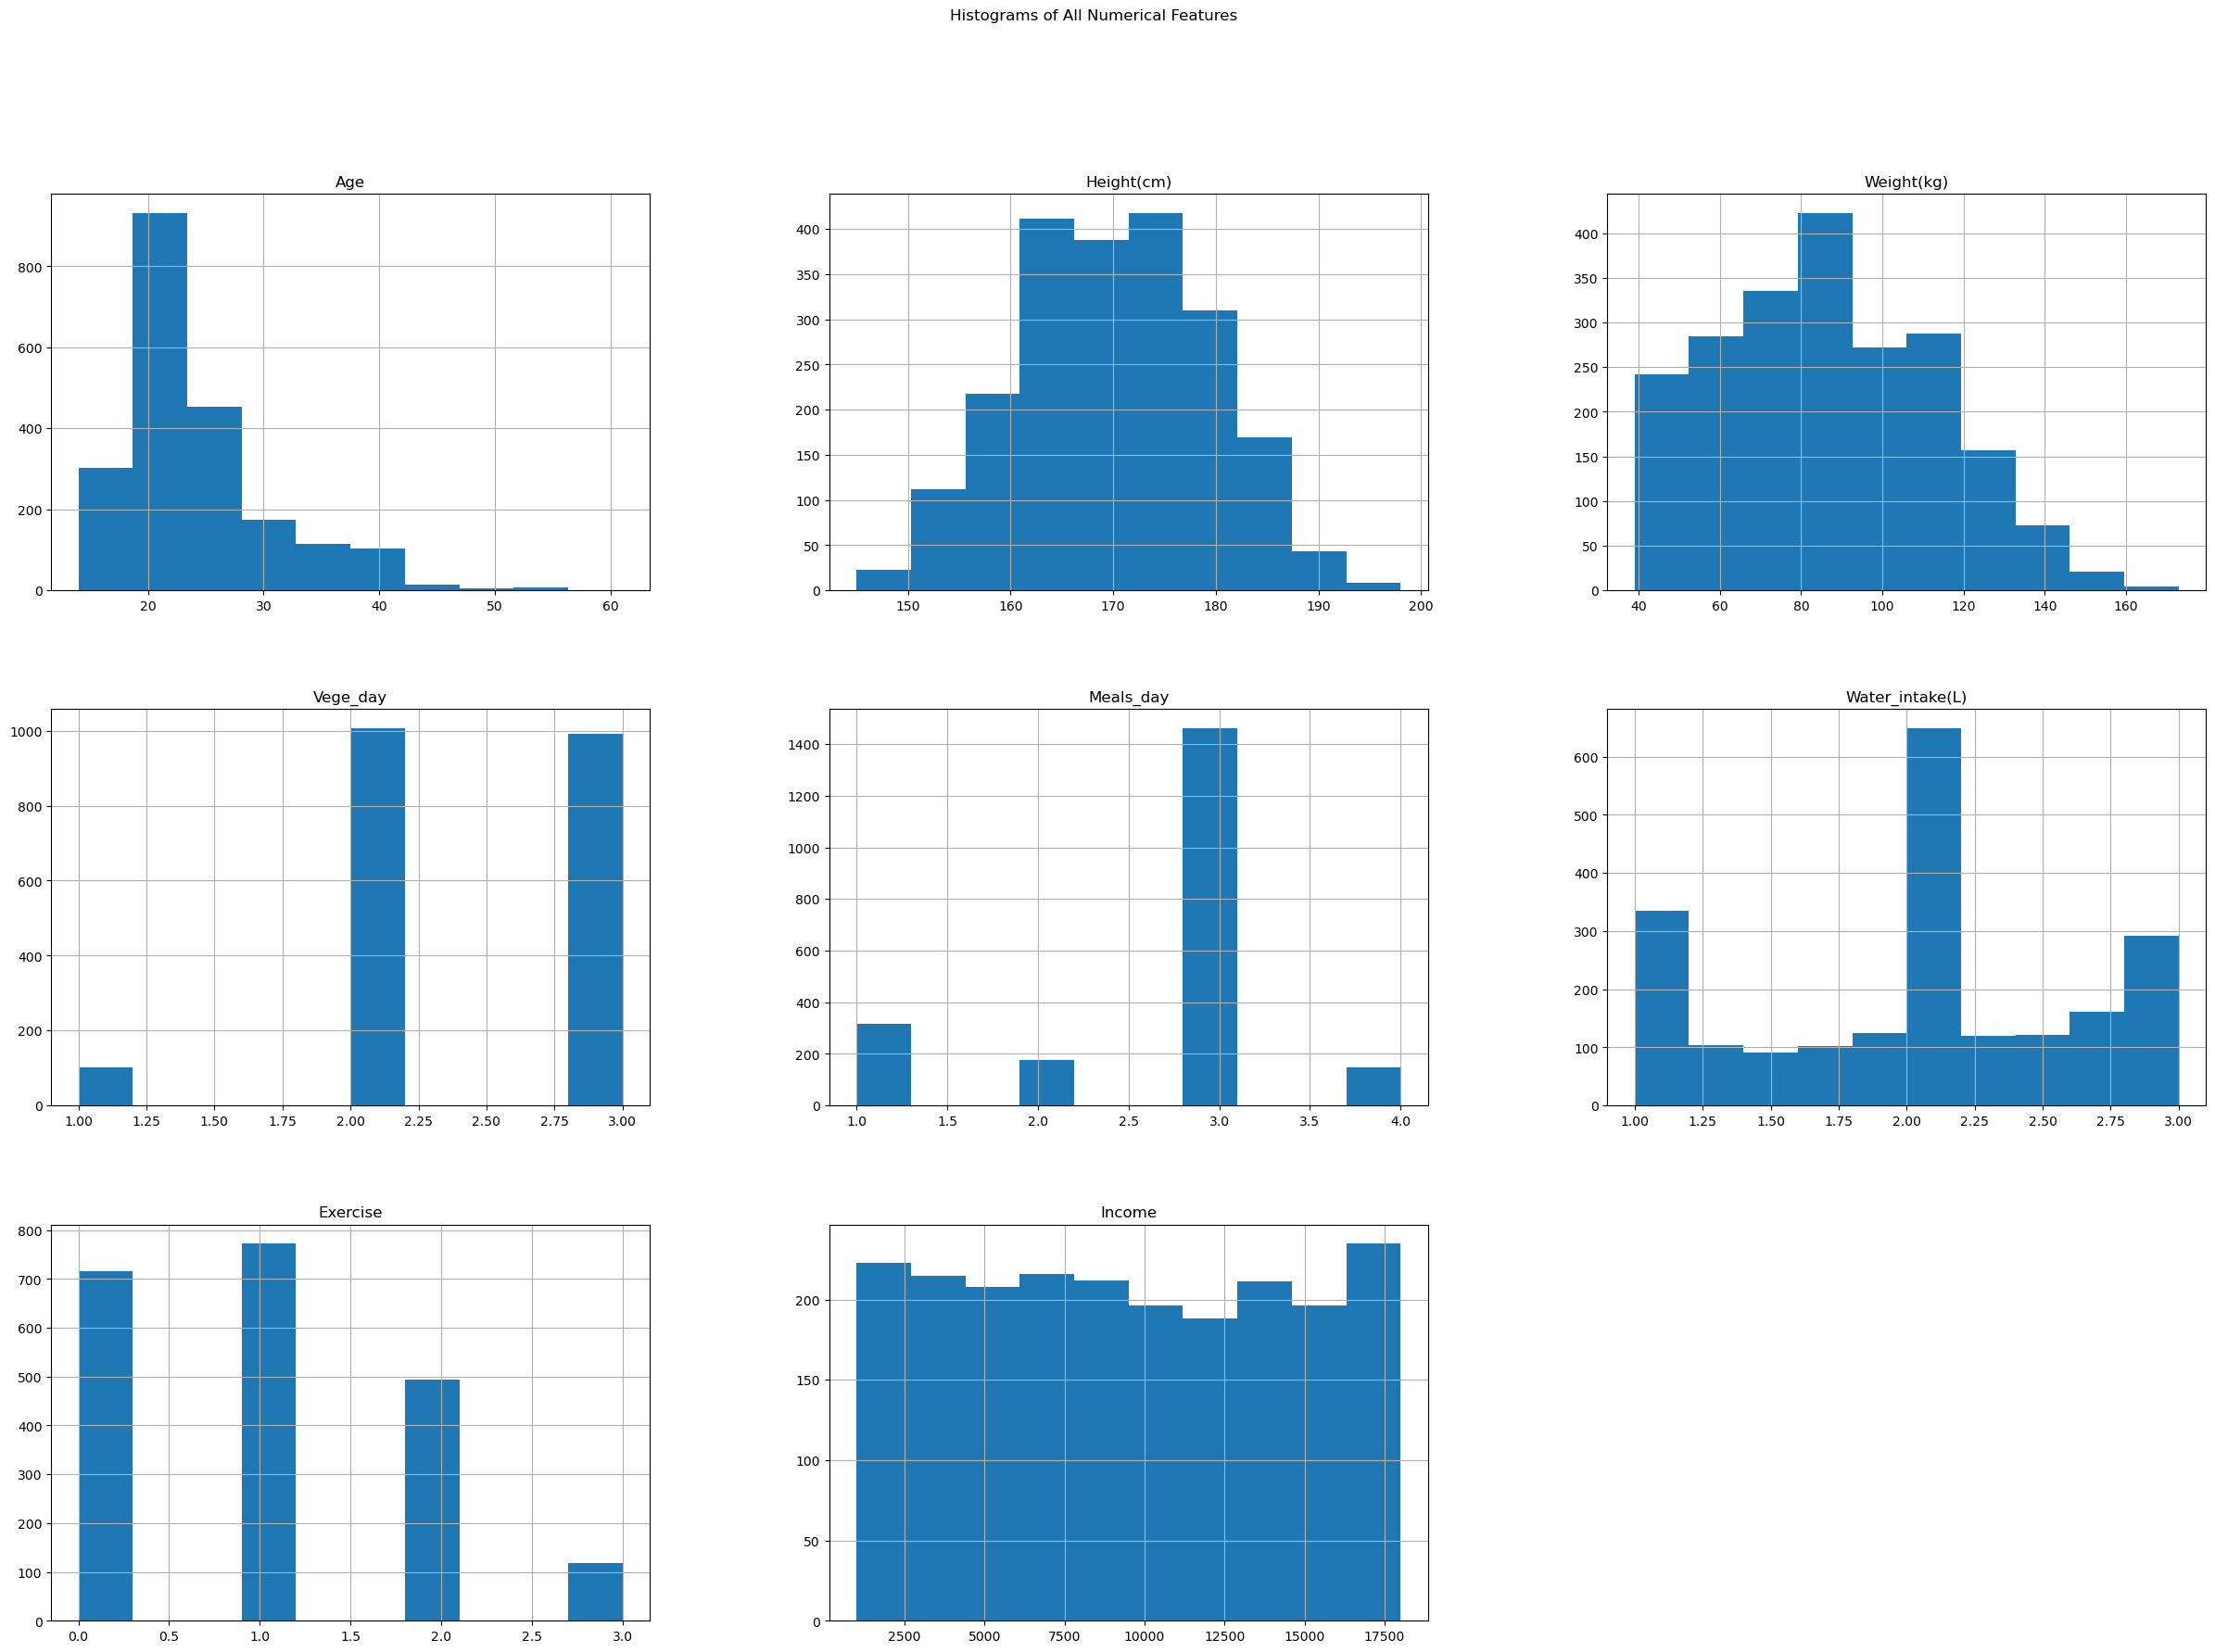

In [3]:
# Data Exploration and Visualization
import matplotlib.pyplot as plt

# Distribution of a numerical feature (e.g., Age)
data.hist(figsize=(30, 20))
plt.suptitle('Histograms of All Numerical Features')
plt.show()

# Preprocessing Data

X shape: (2100, 17)
y shape: (2100,)

Cardiovascular_risk(y)
high      967
medium    576
low       557
Name: count, dtype: int64


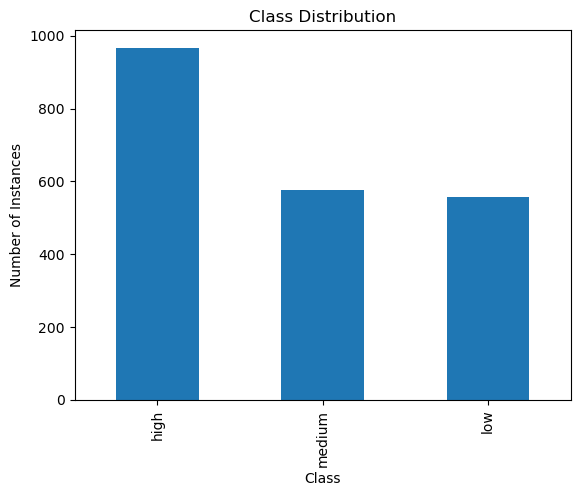

In [4]:
# Separating the output from input
X = data.drop('Cardiovascular_risk(y)', axis=1)
y = data['Cardiovascular_risk(y)']

print("X shape:", X.shape)
print("y shape:", y.shape)

print()
class_distribution = y.value_counts()
print(class_distribution)
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.show()

In [5]:
# split the dataset into test and training set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X shape:", X.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X shape: (2100, 17)
X_train shape: (1680, 17)
X_test shape: (420, 17)


In [6]:
# Preprocess train data
# Split the input matrix into numerical and categorical sets
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.drop(X_train_cat.columns, axis=1)

# Standardize numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)
scaler.fit(X_train_num)       
X_train_num_scaled = scaler.transform(X_train_num)

# One-hot encode multiple categorical data
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
X_train_cat_encoded = one_hot_encoder.fit_transform(X_train_cat)

print('X_train_num_scaled shape:', X_train_num_scaled.shape)
print('X_train_cat_encoded shape:', X_train_cat_encoded.shape)

# combine the transformed numerical and categorical sets
X_train_final = np.hstack([X_train_num_scaled, X_train_cat_encoded])
y_train = np.array(y_train)  #convert to numpy array

print('X_train_final shape:', X_train_final.shape)
print('y_train shape:', y_train.shape)

X_train_num_scaled shape: (1680, 8)
X_train_cat_encoded shape: (1680, 26)
X_train_final shape: (1680, 34)
y_train shape: (1680,)


# Model Training

In [7]:
# Training the model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_final, y_train)

LogisticRegression(random_state=42)

# Model Validating

In [8]:
def show10results(y_train, y_pred):
    print('Result for the 10 random samples:')
    selected = np.random.randint(0, len(y_train), 10)
    for i in selected:
        print('actual = {:<15}  pred ={:<15}'.format(y_train[i], y_pred[i]))

# Predict on the training data
y_train_pred = logreg.predict(X_train_final)
show10results(y_train, y_train_pred)

Result for the 10 random samples:
actual = high             pred =high           
actual = high             pred =high           
actual = medium           pred =medium         
actual = high             pred =high           
actual = high             pred =high           
actual = high             pred =high           
actual = medium           pred =medium         
actual = high             pred =high           
actual = high             pred =high           
actual = medium           pred =medium         


Training Accuracy: 0.985714
Training Classification Report:
              precision    recall  f1-score   support

        high     0.9987    0.9975    0.9981       787
         low     0.9906    0.9613    0.9757       439
      medium     0.9594    0.9890    0.9740       454

    accuracy                         0.9857      1680
   macro avg     0.9829    0.9826    0.9826      1680
weighted avg     0.9860    0.9857    0.9857      1680

Training Confusion Matrix:


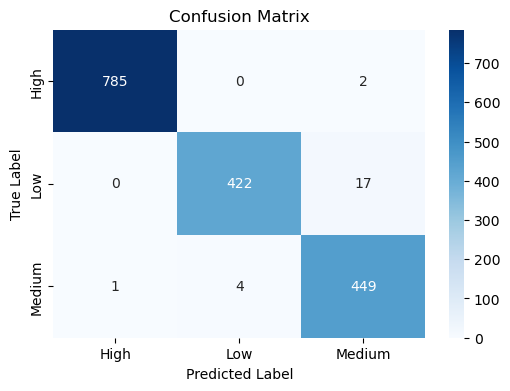

In [9]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.6f}")

# Classification report
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred, digits=4)) # we can know the order [0,1,2] is ['high', 'low', 'medium']
# or we can know the order which is >print(logreg.classes_)

# Confusion matrix
import seaborn as sns
print("Training Confusion Matrix:")
conf_matrix = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Cross-Validating Result for model before fine tune

Cross-validated accuracy scores: [0.9702381  0.97321429 0.9702381  0.9702381  0.97321429]
Average accuracy: 0.971429
Cross-validation Classification Report:
              precision    recall  f1-score   support

        high     0.9961    0.9848    0.9904       787
         low     0.9810    0.9431    0.9617       439
      medium     0.9229    0.9758    0.9486       454

    accuracy                         0.9714      1680
   macro avg     0.9667    0.9679    0.9669      1680
weighted avg     0.9724    0.9714    0.9716      1680

Cross-validation Confusion Matrix:


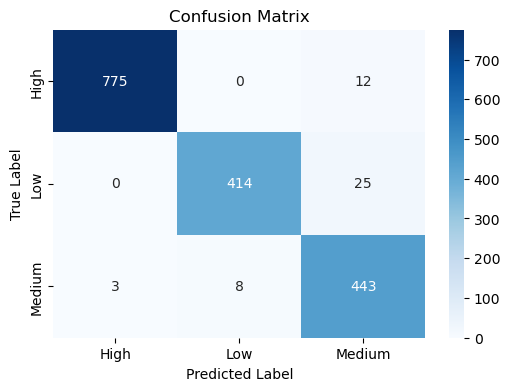

In [10]:
# Perform cross-validated predictions
from sklearn.model_selection import cross_val_score, cross_val_predict

def evaluate_training(model, X_train, y_train, cv=5):
    k_scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=cv)
    print(f"Cross-validated accuracy scores: {k_scores}")
    print(f"Average accuracy: {k_scores.mean():.6f}")

    # Perform cross-validated predictions
    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv)
    
    print("Cross-validation Classification Report:")
    print(classification_report(y_train, y_pred_cv, digits=4))
    
    print("Cross-validation Confusion Matrix:")
    conf_matrix = confusion_matrix(y_train, y_pred_cv)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

evaluate_training(logreg, X_train_final, y_train)

- k_scores indicating consistent and high accuracy across different folds, we can say that
it is stable and generalizes well across different subsets of the training data

- The "low" and "Medium" classes have lower recall and precision

# Tuning

In [11]:
# Fine Tuning
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'class_weight': [None, 'balanced'], 'max_iter': [100, 1000, 2000, 5000]},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'], 'class_weight': [None, 'balanced'], 'max_iter': [100, 1000, 2000, 5000]}
]

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_final, y_train)

best_model = grid_search.best_estimator_

print(best_model)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

LogisticRegression(C=1, penalty='l1', random_state=42, solver='saga')
Best parameters: {'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.9873867232331068


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Cross-Validating Result for model after fine tune

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

Cross-validated accuracy scores: [0.98511905 0.98511905 0.98809524 0.99107143 0.99702381]
Average accuracy: 0.989286


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Cross-validation Classification Report:
              precision    recall  f1-score   support

        high     0.9975    0.9962    0.9968       787
         low     0.9931    0.9772    0.9851       439
      medium     0.9719    0.9890    0.9803       454

    accuracy                         0.9893      1680
   macro avg     0.9875    0.9875    0.9874      1680
weighted avg     0.9894    0.9893    0.9893      1680

Cross-validation Confusion Matrix:


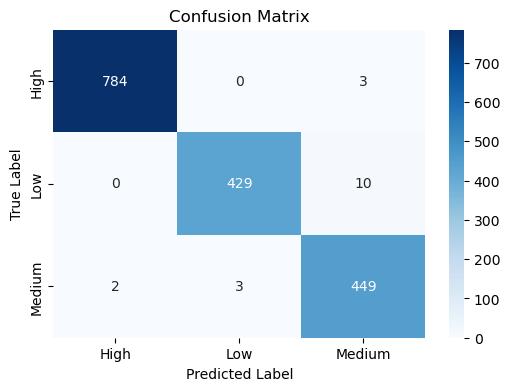

In [12]:
evaluate_training(best_model, X_train_final, y_train)

# Testing
### Logistic Regression Model result without fine tuning： 

In [13]:
# Preprocess the test set
X_test_cat  = X_test.select_dtypes(include=['object'])
X_test_num = X_test.drop(X_train_cat.columns, axis=1)

# Standardize numeric data
X_test_num_scaled = scaler.transform(X_test_num)

# One-hot encode multiple categorical data
X_test_cat_encoded = one_hot_encoder.transform(X_test_cat)

# combine the transformed numerical and categorical sets
X_test_final = np.hstack([X_test_num_scaled, X_test_cat_encoded])
y_test = np.array(y_test)  #convert to numpy array

print('X_test_num_scaled shape:', X_test_num_scaled.shape)
print('y_test_cat_encoded shape:', X_test_cat_encoded.shape)
print('X_test_final shape:', X_test_final.shape)
print('y_test shape:', y_test.shape)


X_test_num_scaled shape: (420, 8)
y_test_cat_encoded shape: (420, 26)
X_test_final shape: (420, 34)
y_test shape: (420,)


Test Set Classification Report:
              precision    recall  f1-score   support

        high     0.9945    1.0000    0.9972       180
         low     0.9727    0.9068    0.9386       118
      medium     0.9147    0.9672    0.9402       122

    accuracy                         0.9643       420
   macro avg     0.9606    0.9580    0.9587       420
weighted avg     0.9652    0.9643    0.9642       420

Test Set Confusion Matrix:


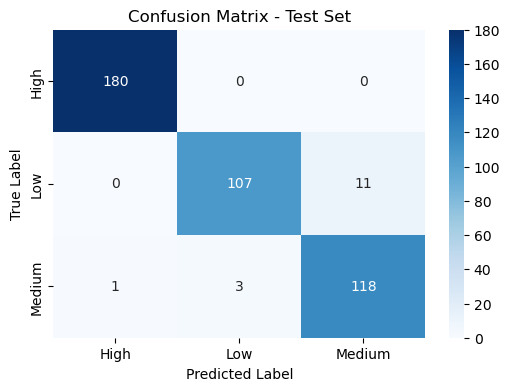

In [14]:
# evaluate on the test set

def evaluate_test_model(model, X_test, y_test):
    
    # Perform predictions on the test set
    y_pred = model.predict(X_test)

    # Print classification report
    print("Test Set Classification Report:")
    print(classification_report(y_test, y_pred, digits=4)) 

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Test Set Confusion Matrix:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Test Set')
    plt.show()

evaluate_test_model(logreg, X_test_final, y_test)

### Logistic Regression Model (Best Model) result after fine-tuning:

Test Set Classification Report:
              precision    recall  f1-score   support

        high     1.0000    1.0000    1.0000       180
         low     0.9912    0.9576    0.9741       118
      medium     0.9603    0.9918    0.9758       122

    accuracy                         0.9857       420
   macro avg     0.9838    0.9831    0.9833       420
weighted avg     0.9860    0.9857    0.9857       420

Test Set Confusion Matrix:


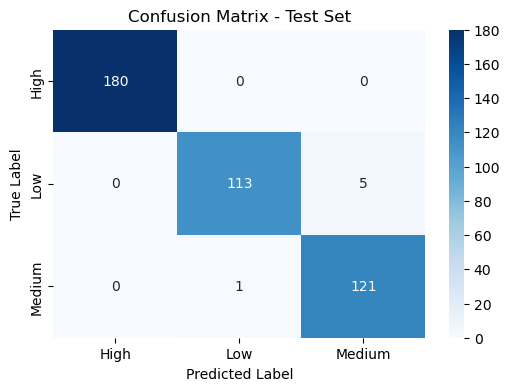

In [15]:
evaluate_test_model(best_model, X_test_final, y_test)

# Precision-Recall Graph and ROC curve (before fine tune)

Selected threshold for High: 0.4399
Precision at selected threshold: 0.9898
Recall at selected threshold: 0.9911

Selected threshold for Low: 0.2898
Precision at selected threshold: 0.9519
Recall at selected threshold: 0.9909

Selected threshold for Medium: 0.3461
Precision at selected threshold: 0.8555
Recall at selected threshold: 0.9912



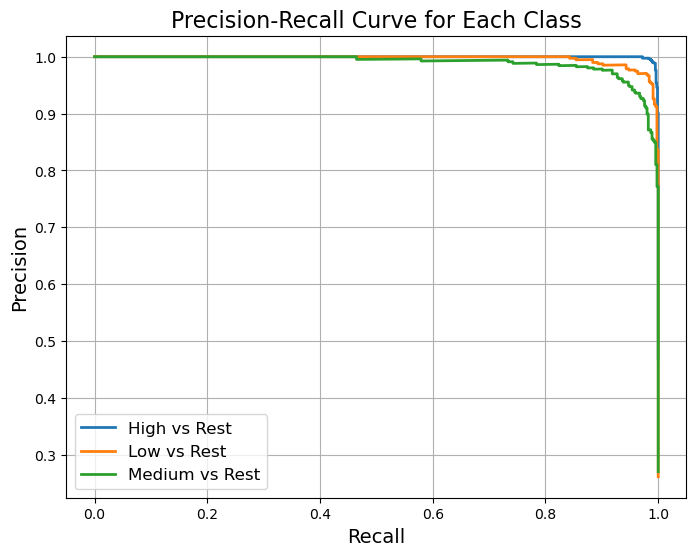

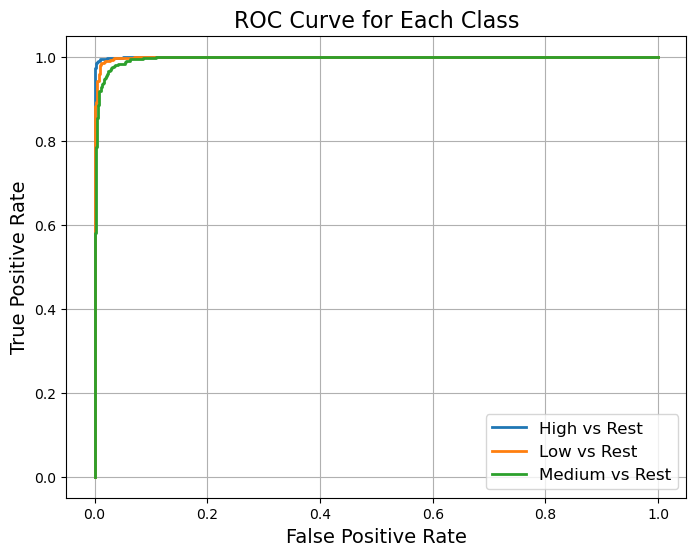

AUC for high vs Rest: = 0.9996
AUC for low vs Rest: = 0.9988
AUC for medium vs Rest: = 0.9962
{'high': 0.4398836905400664, 'low': 0.28976568503957006, 'medium': 0.34605706638323636}


In [16]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

RECALL_VALUE = 0.99

def plot_graphs_recall(model, X_train_final, y_train, desire_recall=0.98):
    # Binarize y_train for multiclass classification (convert to binary labels for each class)
    classes = np.unique(y_train)
    
    # Get decision scores using cross_val_predict with method "decision_function"
    y_scores_cv = cross_val_predict(model, X_train_final, y_train, cv=5, method="predict_proba")
    '''
      h,    l,    m
    [[0.98  0.87  0.45
      0.95  045   0.22
            ...
    ]] 
    '''
    thresholds_dict = {}

    plt.figure(figsize=(8, 6))  # Increase figure size for better readability
    
    for i, class_label in enumerate(classes):
        # Extract the probabilities for the current class (i-th column corresponds to the i-th class)
        y_scores_class = y_scores_cv[:, i]
        
        # Binarize y_train for the current class (1 for the class, 0 for the others)
        y_train_bin = (y_train == class_label).astype(int)
        
        # Precision-recall curve for each class (class vs not class)
        precision, recall, thresholds = precision_recall_curve(y_train_bin, y_scores_class)

        # finding threshold
        idx_recall = np.argmin(recall >= desire_recall)-1
        selected_threshold = thresholds[idx_recall]
        
        # Store the threshold for the current class
        thresholds_dict[class_label] = selected_threshold
        
        print(f"Selected threshold for {class_label.capitalize()}: {selected_threshold:.4f}")
        print(f"Precision at selected threshold: {precision[idx_recall]:.4f}")
        print(f"Recall at selected threshold: {recall[idx_recall]:.4f}")
        print()
        
        # Plot precision-recall curve
        plt.plot(recall, precision, lw=2, label=f'{class_label.capitalize()} vs Rest')
    
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title('Precision-Recall Curve for Each Class', fontsize=16)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)
    plt.show()

    # ROC Curve
    plt.figure(figsize=(8, 6))

    auc = []
    for i, class_label in enumerate(classes):
        # Extract the decision scores for the current class (i-th column corresponds to the i-th class)
        y_scores_class = y_scores_cv[:, i]
        
        # Binarize y_train for the current class (1 for the class, 0 for the others)
        y_train_bin = (y_train == class_label).astype(int)

        # ROC curve for each class (class vs not class)
        fpr, tpr, threshold = roc_curve(y_train_bin, y_scores_class)

        auc.append(roc_auc_score(y_train_bin, y_scores_class))
        
        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{class_label.capitalize()} vs Rest')
    
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('ROC Curve for Each Class', fontsize=16)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)
    plt.show()

    for i, class_label in enumerate(classes):
        print(f'AUC for {class_label} vs Rest: = {auc[i]:.4f}')

    return thresholds_dict

# Example usage
thresholds = plot_graphs_recall(logreg, X_train_final, y_train, RECALL_VALUE)
print(thresholds)
# arr = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
# condition = (arr >= 8) -> [t, t, t, f, f, f, f, f, f, f]
# argmax(condition) -> 0
# argmin(condition) -> 3 -1 = 2

# Precision-Recall Graph and ROC curve (after fine tune)

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Selected threshold for High: 0.5578
Precision at selected threshold: 1.0000
Recall at selected threshold: 0.9911

Selected threshold for Low: 0.3717
Precision at selected threshold: 0.9864
Recall at selected threshold: 0.9909

Selected threshold for Medium: 0.4522
Precision at selected threshold: 0.9534
Recall at selected threshold: 0.9912



c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


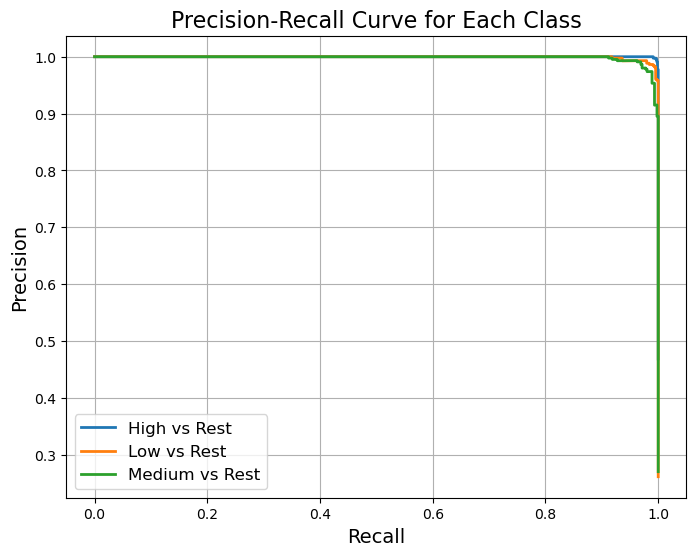

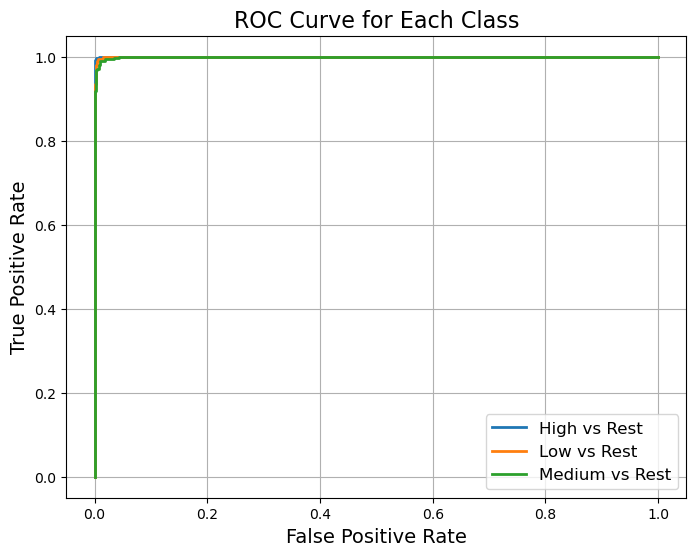

AUC for high vs Rest: = 0.9999
AUC for low vs Rest: = 0.9997
AUC for medium vs Rest: = 0.9994


{'high': 0.5578219164677211,
 'low': 0.3717159238245176,
 'medium': 0.4521578342289529}

In [17]:
plot_graphs_recall(best_model, X_train_final, y_train, RECALL_VALUE)

# Applying Threshold value for high recall on test set

{'high': 0.4398836905400664, 'low': 0.28976568503957006, 'medium': 0.34605706638323636}
Thresholded Classification Report:
              precision    recall  f1-score   support

        high     0.9898    0.9911    0.9905       787
         low     0.9519    0.9909    0.9710       439
      medium     0.9747    0.9339    0.9539       454

    accuracy                         0.9756      1680
   macro avg     0.9721    0.9720    0.9718      1680
weighted avg     0.9758    0.9756    0.9755      1680

Threshold Confusion Matrix:


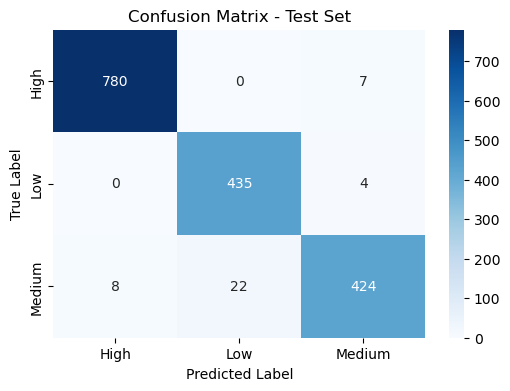

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Thresholded Classification Report:
              precision    recall  f1-score   support

        high     0.9937    0.9975    0.9956       787
         low     0.9798    0.9954    0.9876       439
      medium     0.9910    0.9692    0.9800       454

    accuracy                         0.9893      1680
   macro avg     0.9882    0.9874    0.9877      1680
weighted avg     0.9893    0.9893    0.9893      1680

Threshold Confusion Matrix:


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


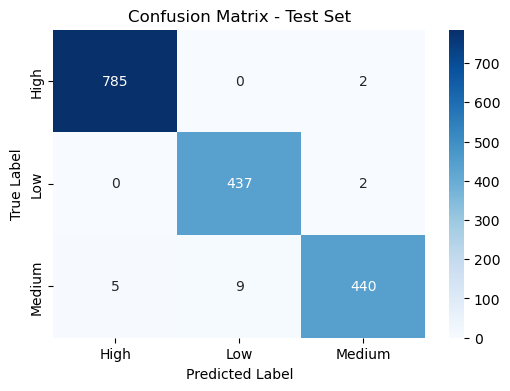

In [18]:
# given the input X_test_final and predict using thresholds to get the predicted values

def apply_threshold(model, X_test, y_test, thresholds={'high': 0.5, 'low': 0.5, 'medium': 0.5}):
    y_scores_test = cross_val_predict(model, X_test, y_test, cv=5, method="predict_proba")
    
    # Use the thresholds to make predictions
    classes = [x for x in thresholds]
    y_pred = []
    for i, class_label in enumerate(classes):
        threshold = thresholds[class_label]
        y_pred_class = (y_scores_test[:, i] >= threshold).astype(int)
        y_pred.append(y_pred_class)
    
    # Combine the binary decisions for all classes
    y_pred = np.column_stack(y_pred)
    
    y_pred_final_idx = np.argmax(y_pred, axis=1)
    # Map the index back to the corresponding class labels
    y_pred_final = np.array(classes)[y_pred_final_idx]

    # Print classification report
    print("Thresholded Classification Report:")
    print(classification_report(y_test, y_pred_final, digits=4)) 

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_final)
    print("Threshold Confusion Matrix:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Test Set')
    plt.show()

print(thresholds)
apply_threshold(logreg, X_train_final, y_train, thresholds)

apply_threshold(best_model, X_train_final, y_train, thresholds)


In [19]:
'''
np.random.seed(1)
arr = np.array(['a', 'b', 'c'])
print(arr)
index1 = np.random.randint(0, 2, 10)
index2 = np.random.randint(0, 2, 3)
print("index1: ", index1)
print("index2:", index2)
print()
print(arr[index1])
# ['high', 'low', 'medium'][2, 2, 1]
'''

'\nnp.random.seed(1)\narr = np.array([\'a\', \'b\', \'c\'])\nprint(arr)\nindex1 = np.random.randint(0, 2, 10)\nindex2 = np.random.randint(0, 2, 3)\nprint("index1: ", index1)\nprint("index2:", index2)\nprint()\nprint(arr[index1])\n# [\'high\', \'low\', \'medium\'][2, 2, 1]\n'